# [Leetcode322-零钱兑换](https://leetcode.cn/problems/coin-change/)

给定不同面额的硬币 coins 和一个总金额 amount。编写一个函数来计算可以凑成总金额所需的最少的硬币个数。如果没有任何一种硬币组合能组成总金额，返回 -1。
你可以认为每种硬币的数量是无限的。

示例 1：
- 输入：coins = [1, 2, 5], amount = 11
- 输出：3
- 解释：11 = 5 + 5 + 1

示例 2：
- 输入：coins = [2], amount = 3
- 输出：-1

示例 3：
- 输入：coins = [1], amount = 0
- 输出：0

示例 4：
- 输入：coins = [1], amount = 1
- 输出：1

示例 5：
- 输入：coins = [1], amount = 2
- 输出：2

提示：
- 1 <= coins.length <= 12
- 1 <= coins[i] <= 2^31 - 1
- 0 <= amount <= 10^4

In [4]:
from typing import List

class Solution:
    def coinChange(self, coins: List[int], amount: int) -> int:
        dp = [2 ** 64 - 1] * (amount + 1)
        dp[0] = 0
        for coin in coins:
            for j in range(1, amount + 1):
                dp[j] = min(dp[j], dp[j - coin] + 1)

        if dp[amount] == 2 ** 64 - 1:
            return -1
        print(dp)
        return dp[amount]
    
if __name__ == "__main__":
    solution = Solution()
    solution.coinChange([1, 2, 5], 11)

[0, 1, 1, 2, 2, 1, 2, 2, 3, 3, 2, 3]


# [Leetcode279-完全平方数](https://leetcode.cn/problems/perfect-squares/)

给你一个整数 n ，返回和为 n 的完全平方数的最少数量 。
完全平方数是一个整数，其值等于另一个整数的平方；换句话说，其值等于一个整数自乘的积。例如，1、4、9 和 16 都是完全平方数，而 3 和 11 不是。

示例 1： 
- 输入：n = 12 
- 输出：3   
- 解释：12 = 4 + 4 + 4 

示例 2： 
- 输入：n = 13 
- 输出：2 
- 解释：13 = 4 + 9 

提示： 
1 <= n <= 10 ^ 4

In [5]:
class Solution:
    def numSquares(self, n: int) -> int:
        dp = [2 ** 64 - 1] * (n + 1)
        dp[0] = 0
        for i in range(1, n + 1):
            for j in range(1, int(i ** 0.5) + 1):
                dp[i] = min(dp[i], dp[i - j * j] + 1)
        return dp[n]            
        

# [Leetcode139-单词拆分](https://leetcode.cn/problems/word-break/)

给你一个字符串 s 和一个字符串列表 wordDict 作为字典。如果可以利用字典中出现的一个或多个单词拼接出 s 则返回 true。

注意：不要求字典中出现的单词全部都使用，并且字典中的单词可以重复使用。

示例 1：
- 输入: s = "leetcode", wordDict = ["leet", "code"]
- 输出: true
- 解释: 返回 true 因为 "leetcode" 可以由 "leet" 和 "code" 拼接成。

示例 2：
- 输入: s = "applepenapple", wordDict = ["apple", "pen"]
- 输出: true
- 解释: 返回 true 因为 "applepenapple" 可以由 "apple" "pen" "apple" 拼接成。注意，你可以重复使用字典中的单词。

示例 3：
- 输入: s = "catsandog", wordDict = ["cats", "dog", "sand", "and", "cat"]
- 输出: false
 
提示：
- 1 <= s.length <= 300
- 1 <= wordDict.length <= 1000
- 1 <= wordDict[i].length <= 20
- s 和 wordDict[i] 仅由小写英文字母组成
- wordDict 中的所有字符串 互不相同

In [7]:
from typing import List

class Solution:
    def wordBreak(self, s: str, wordDict: List[str]) -> bool:
        wordSet = set(wordDict)
        n = len(s)
        dp = [False] * (n + 1)
        dp[0] = True

        for i in range(1, n + 1):
            for j in range(i):
                if dp[j] and s[j : i] in wordSet:
                    dp[j] = True
                    break 
        return dp[n]       

# [Leetcode198-打家劫舍](https://leetcode.cn/problems/house-robber/)

你是一个专业的小偷，计划偷窃沿街的房屋。每间房内都藏有一定的现金，影响你偷窃的唯一制约因素就是相邻的房屋装有相互连通的防盗系统，如果两间相邻的房屋在同一晚上被小偷闯入，系统会自动报警。

给定一个代表每个房屋存放金额的非负整数数组，计算你不触动警报装置的情况下 ，一夜之内能够偷窃到的最高金额。

 

示例 1：
- 输入：[1,2,3,1]
- 输出：4
- 解释：偷窃 1 号房屋 (金额 = 1) ，然后偷窃 3 号房屋 (金额 = 3)。偷窃到的最高金额 = 1 + 3 = 4 。

- 示例 2：
输入：[2,7,9,3,1]
输出：12
解释：偷窃 1 号房屋 (金额 = 2), 偷窃 3 号房屋 (金额 = 9)，接着偷窃 5 号房屋 (金额 = 1)。偷窃到的最高金额 = 2 + 9 + 1 = 12 。
 

提示：
- 1 <= nums.length <= 100
- 0 <= nums[i] <= 400

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        n = len(nums)
        if n == 0:
            return 0
        if n == 1:
            return nums[0]
        
        dp = [0] * n
        dp[0] = nums[0]
        dp[1] = max(nums[0], nums[1])
        for i in range(2, n):
            dp[i] = max(dp[i - 2] + nums[i], dp[i - 1])
        return dp[-1]

# [Leetcode213-打家劫舍II](https://leetcode.cn/problems/house-robber-ii/description/)

你是一个专业的小偷，计划偷窃沿街的房屋，每间房内都藏有一定的现金。这个地方所有的房屋都 围成一圈 ，这意味着第一个房屋和最后一个房屋是紧挨着的。同时，相邻的房屋装有相互连通的防盗系统，如果两间相邻的房屋在同一晚上被小偷闯入，系统会自动报警 。

给定一个代表每个房屋存放金额的非负整数数组，计算你 在不触动警报装置的情况下 ，今晚能够偷窃到的最高金额。

示例 1：
- 输入：nums = [2,3,2]
- 输出：3
- 解释：你不能先偷窃 1 号房屋（金额 = 2），然后偷窃 3 号房屋（金额 = 2）, 因为他们是相邻的。

示例 2：
- 输入：nums = [1,2,3,1]
- 输出：4
解释：你可以先偷窃 1 号房屋（金额 = 1），然后偷窃 3 号房屋（金额 = 3）。偷窃到的最高金额 = 1 + 3 = 4 。

示例 3：
- 输入：nums = [1,2,3]
- 输出：3
 
提示：
- 1 <= nums.length <= 100
- 0 <= nums[i] <= 1000

In [ ]:
class Solution:
    def rob(self, nums: List[int]) -> int:
        n = len(nums)
        if n == 0:
            return 0
        if n == 1:
            return nums[0]
        if n == 2:
            return max(nums[0], nums[1])
        
        dp1 = [0] * n
        dp1[0] = nums[0]
        dp1[1] = max(nums[0], nums[1])
        for i in range(2, n - 1):
            dp1[i] = max(dp1[i - 2] + nums[i], dp1[i - 1])
        res1 = dp1[-2]

        dp2 = [0] * n
        dp2[0] = 0
        dp2[1] = nums[1]
        for i in range(2, n):
            dp2[i] = max(dp2[i - 2] + nums[i], dp2[i - 1])
        res2 = dp2[-1]

        return max(res1, res2)

        

# [Leetcode337-打家劫舍III](https://leetcode.cn/problems/house-robber-iii/description/)

在上次打劫完一条街道之后和一圈房屋后，小偷又发现了一个新的可行窃的地区。这个地区只有一个入口，我们称之为“根”。 除了“根”之外，每栋房子有且只有一个“父“房子与之相连。一番侦察之后，聪明的小偷意识到“这个地方的所有房屋的排列类似于一棵二叉树”。 如果两个直接相连的房子在同一天晚上被打劫，房屋将自动报警。

计算在不触动警报的情况下，小偷一晚能够盗取的最高金额。

示例 1:

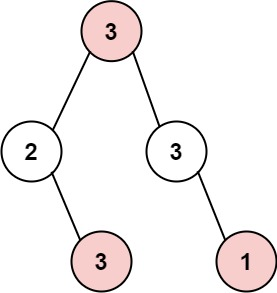

- 输入: root = [3,2,3,null,3,null,1]
- 输出: 7 
- 解释: 小偷一晚能够盗取的最高金额 3 + 3 + 1 = 7

示例 2:

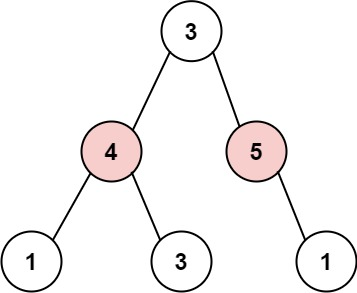

- 输入: root = [3,4,5,1,3,null,1]
- 输出: 9
- 解释: 小偷一晚能够盗取的最高金额 4 + 5 = 9

In [10]:
# Definition for a binary tree node.

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

from typing import Optional

# 这个题目的dp数组长度为2，dp[0]代表不偷当前节点，dp[1]代表偷当前节点，是一种“状态”的概念

class Solution:
    def robTree(self, cur: Optional[TreeNode]):
        if cur is None:
            return [0, 0]
        left = self.robTree(cur.left)
        right = self.robTree(cur.right)
        # 偷cur这个节点，不偷它的子节点
        val1 = cur.val + left[0] + right[0]
        # 不偷cur，偷它的子节点
        val2 = max(left[0], left[1]) + max(right[0], right[1])
        return [val2, val1]

    def rob(self, root: Optional[TreeNode]) -> int:
        res = self.robTree(root)
        return max(res[0], res[1])

# [Leetcode121-买卖股票的最佳时机](https://leetcode.cn/problems/best-time-to-buy-and-sell-stock/description/)

给定一个数组 prices ，它的第 i 个元素 prices[i] 表示一支给定股票第 i 天的价格。

你只能选择某一天买入这只股票，并选择在未来的某一个不同的日子卖出该股票。设计一个算法来计算你所能获取的最大利润。

返回你可以从这笔交易中获取的最大利润。如果你不能获取任何利润，返回 0 。

示例 1：
- 输入：[7,1,5,3,6,4]
- 输出：5
- 解释：在第 2 天（股票价格 = 1）的时候买入，在第 5 天（股票价格 = 6）的时候卖出，最大利润 = 6-1 = 5 。注意利润不能是 7-1 = 6, 因为卖出价格需要大于买入价格；同时，你不能在买入前卖出股票。

示例 2：
- 输入：prices = [7,6,4,3,1]
- 输出：0
- 解释：在这种情况下, 没有交易完成, 所以最大利润为 0。
 

提示：
- 1 <= prices.length <= 105
- 0 <= prices[i] <= 104

In [ ]:
from typing import List
# 贪心
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        lowest = 2 ** 64 - 1
        n = len(prices)
        res = 0
        for i in range(n):
            lowest = min(lowest, prices[i])
            res = max(res, prices[i] - lowest)
        return res
        

In [ ]:
from typing import List
# 动态规划
class Solution:
    def maxProfit(self, prices: List[int]) -> int:
        n = len(prices)
        if n == 0:
            return 0
        
        dp = [[0] * 2 for _ in range(n)]

        # 这里的dp[i][0]表示持有下标为i的股票，dp[i][1]表示不持有下标为i的股票

        dp[0][0] -= prices[0]
        dp[0][1] = 0

        for i in range(1, n):
            # dp[i][0]表示持有下标为i的股票，可以从前一个状态递推出来
            dp[i][0] = max(dp[i - 1][0], -prices[i])
            # dp[i][1]表示不持有下标为i的股票，可以从前一个状态推出来
            dp[i][1] = max(dp[i - 1][1], prices[i] + dp[i - 1][0])

        return dp[n - 1][1]
